In [30]:
from imp import reload
from matplotlib.pylab import subplots, hist, figure
import matplotlib.pyplot as plt
import numpy as np
import tifffile as tiff
%matplotlib inline
import tables as tb
from os.path import join
import watershed3d
reload(watershed3d)

<module 'watershed3d' from '/Users/jakob/Documents/RU/Code/watershed3d/watershed3d.py'>

In [31]:
file1_nuc = '/media/data/jakob/HE_quantification/Human_embryos/Ex24w3_D_OCT4nc_pSMAD158nc_NANOG594nc_3_2_16/10_Ex24w3_D_OCT4nc_pSMAD158nc_NANOG594nc_3_2_16_C1.tif'
# file1_nuc = '/Users/jakob/Documents/RU/Data/HE_quantification/Human_embryos/Ex24w3_D_OCT4nc_pSMAD158nc_NANOG594nc_3_2_16/10_Ex24w3_D_OCT4nc_pSMAD158nc_NANOG594nc_3_2_16_C1.tif'
w = watershed3d.Ws3d(file1_nuc)

/Users/jakob/anaconda3/lib/python3.5/site-packages/skimage/external/tifffile/tifffile.py:1398: UserWarning: tags are not ordered by code
  warnings.warn("tags are not ordered by code")


image is three-dimensional
found probability map /media/data/jakob/HE_quantification/Human_embryos/Ex24w3_D_OCT4nc_pSMAD158nc_NANOG594nc_3_2_16/10_Ex24w3_D_OCT4nc_pSMAD158nc_NANOG594nc_3_2_16_C1_Probabilities.h5


In [32]:
# w.intensity_histogram()

In [33]:
w.load_mask(prob=0.5)

shape (31, 1024, 1024) (31, 1024, 1024)
loaded probability map


In [43]:
w.segment(do_not_use_object_classifier=1, sigma=(2,4,4), min_distance=2)

len rp= 336
segmentation done, found 343 cells


In [44]:
# w.grid_plot(w.image_stack, z=10, contrast_stretch=True)

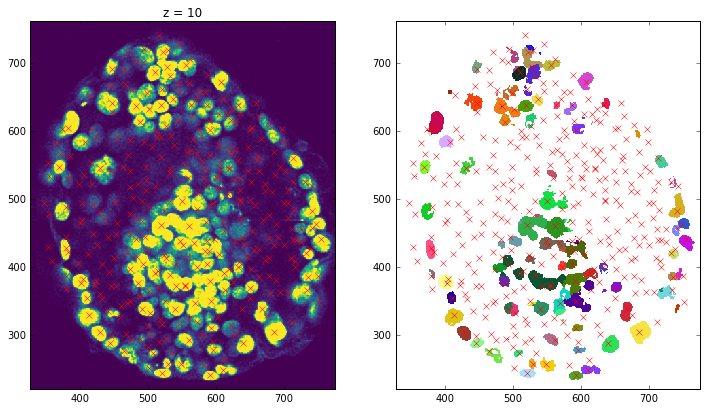

In [46]:
w.show_segmentation(z=10)